# 1. Entendimiento y preparación de los datos

El dataset suministrado está conformado por 43.013 registros y 46 variables que describen en detalle las características físicas, geográficas y de entorno de diferentes viviendas tipo apartamento. Incluye información estructural como el número de habitaciones, baños, parqueaderos, área total y estrato socioeconómico, así como atributos del entorno como la proximidad a estaciones de transporte masivo, parques y zonas recreativas.
Además, incorpora variables complementarias relacionadas con las amenidades del inmueble (presencia de ascensor, piscina, gimnasio, vigilancia, chimenea, terraza, jacuzzi, entre otras) y variables geoespaciales como latitud, longitud y distancia a puntos de interés, lo que permite realizar análisis espaciales.
El conjunto también contiene variables descriptivas y administrativas, incluyendo la cuota de administración, tipo de propiedad, antigüedad, sector, barrio, y compañía inmobiliaria, además del precio de venta, que corresponde a la variable objetivo del estudio.

### Carga y limpieza de Datos

In [11]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
pd.set_option('display.max_columns', None)

def convertir_float(cast_columns_float,df):
    for i in cast_columns_float:
        df[i]=(
        pd.to_numeric(df[i], errors="coerce")
          .round()
          .astype(float)
        )    

In [2]:
# carga fuente insumo
apartamentos_df = pd.read_csv("data/apartamentos.csv")

In [24]:
# Dimensiones dataset
apartamentos_df.shape

(43013, 46)

In [22]:
apartamentos_df.dtypes

_id                         object
codigo                     float64
tipo_propiedad              object
tipo_operacion              object
precio_venta               float64
area                       float64
habitaciones               float64
banos                      float64
administracion             float64
parqueaderos               float64
sector                      object
estrato                    float64
antiguedad                  object
latitud                    float64
longitud                   float64
direccion                   object
descripcion                 object
website                     object
last_view                   object
datetime                    object
url                         object
timeline                    object
estado                      object
compañia                    object
precio_arriendo            float64
jacuzzi                    float64
piso                       float64
closets                    float64
chimenea            

In [ ]:
# Lista de columnas a castear según lo indica el Diccionario de Datos
cast_columns_float = ["codigo"]
#creacion de un nuevo dataframe que será transformado y limipiado
apartamentos_df_clean=apartamentos_df
# Casteo columnas a string segun el diccionario de datos 
convertir_float(cast_columns_float,apartamentos_df_clean)
#se eliminan duplicados
apartamentos_df_clean = apartamentos_df_clean.drop_duplicates()
# Se aplica el filtro de tipo de propiedad igual a Apartamento debido a que el modelo a desarrollar esta orientado a esta clase de vivienda
apartamentos_df_clean=apartamentos_df_clean[apartamentos_df_clean['tipo_propiedad']=='APARTAMENTO']

### Indicadores importantes

#### Indicador distribucion por localidad

Indicador de la cantidad de apartamentos y precio promedio por localidad. Este indicador muestra las localidades con mas oferta inmobiliaria y un costo promedio de venta aproximado.

In [37]:
pd.set_option('display.float_format', '{:.2f}'.format)

tabla = (
    apartamentos_df_clean.groupby('localidad', as_index=False)
      .agg(
          num_apartamentos=('localidad', 'count'),
          precio_promedio=('precio_venta', 'mean')
      )
)

tabla['porcentaje'] = (tabla['num_apartamentos'] / tabla['num_apartamentos'].sum() * 100).round(1)
tabla.sort_values(by='num_apartamentos',ascending=False).head()


,localidad,num_apartamentos,precio_promedio,porcentaje
17,USAQUEN,14828,1908408386.09,34.50
4,CHAPINERO,13032,4525967622.37,30.30
14,SUBA,6806,1583291908.08,15.80
7,FONTIBON,1644,2495363107.28,3.80
8,KENNEDY,1295,597538362.26,3.00


Existe una mayor oferta inmobiliaria en la localidad de Usaquen con cerca del 34% del total. Las localidades de Fontibon y KEnnedy suman menos de un 7% de participacion total. Por otro lado, el mayor precio promedio de venta por apartamento corresponde a la localidad de chapinero con cerca de 4500 millones en promedio.

### Indicadores estructurales del inmueble

In [42]:
apartamentos_df_clean.dtypes

_id                         object
codigo                     float64
tipo_propiedad              object
tipo_operacion              object
precio_venta               float64
area                       float64
habitaciones               float64
banos                      float64
administracion             float64
parqueaderos               float64
sector                      object
estrato                    float64
antiguedad                  object
latitud                    float64
longitud                   float64
direccion                   object
descripcion                 object
website                     object
last_view                   object
datetime                    object
url                         object
timeline                    object
estado                      object
compañia                    object
precio_arriendo            float64
jacuzzi                    float64
piso                       float64
closets                    float64
chimenea            

In [47]:
apartamentos_df_clean["habitaciones"].value_count()

AttributeError: 'Series' object has no attribute 'value_count'

In [45]:
apartamentos_df_clean[["habitaciones","banos","parqueaderos"]].value_counts(normalize=True)

habitaciones  banos  parqueaderos
3.00          3.00   2.00           0.11
              2.00   1.00           0.10
2.00          2.00   1.00           0.06
3.00          4.00   2.00           0.06
2.00          3.00   2.00           0.05
                                    ... 
3.00          2.00   20.00          0.00
4.00          1.00   2.00           0.00
              4.00   30.00          0.00
5.00          1.00   0.00           0.00
7.00          6.00   1.00           0.00
Name: proportion, Length: 125, dtype: float64

### Analisis Univariado

#### Variable "hotel"

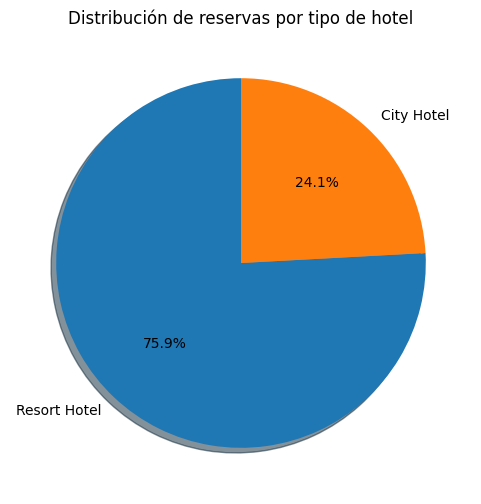

In [11]:
# obtencion de valores unicos, el valor mas repetido y su frecuencia
reservation_df_clean["hotel"].describe()

# Calculando la tabla de frecuencias relativas
reservation_df_clean["hotel"].value_counts(dropna=False, normalize=True)

# Graficando frecuencias relativas variable hotel
reservation_df_clean["hotel"].value_counts().plot.pie(
    autopct='%1.1f%%',   # Muestra porcentajes
    figsize=(6, 6),      # Tamaño del gráfico
    startangle=90,       # Rotación inicial
    shadow=True          # Sombra opcional
)

plt.ylabel("")  # Quita la etiqueta del eje Y
plt.title("Distribución de reservas por tipo de hotel")
plt.show()

Cerca del 76% de las registros corresponden a "Resort Hotel" y el 24 % a "City hotel". Se puede deber a mayor demanda real en el "Resort Hotel" o a la existencia de mas datos en el tiempo respecto a "City Hotel". Más adelante se puede analizar las cancelaciones y reservas en el tiempo para entender mejor la causa.

#### Variable reservation_status

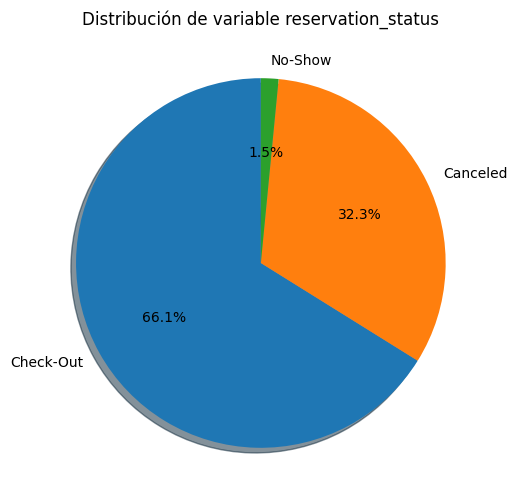

In [12]:
# obtencion de valores unicos, conteo, moda
reservation_df_clean["reservation_status"].describe()
# Calculando la tabla de frecuencias del campo reservation_status
reservation_df_clean["reservation_status"].value_counts(dropna=False, normalize=True)

# Graficando frecuencias relativas variable reservation_status
reservation_df_clean["reservation_status"].value_counts().plot.pie(
    autopct='%1.1f%%',   # Muestra porcentajes
    figsize=(6, 6),      # Tamaño del gráfico
    startangle=90,       # Rotación inicial
    shadow=True          # Sombra opcional
)

plt.ylabel("")  # Quita la etiqueta del eje Y
plt.title("Distribución de variable reservation_status")
plt.show()

Cerca del 66% de las reservas son tomadas exitosamente. Hay un 32.3% de reservas que son canceladas, por lo que es importante analizar que factores conducieron a la cancelación por parte del cliente y que oportunidades de mejora se pueden aplicar en la estrategia de alojamiento del cliente. Finalmente, cerca del 1.5% de alojamientos no se hizo el check-in y el cliente informo el motivo. Si se tuviera la información relacionada al motivo, se podría analizar si esos motivos relacionan al servicio de hospedaje, pero como no se tiene, se plantea como un futuro análisis.

#### Variable deposit_type

C:\Users\Diego\AppData\Local\Temp\ipykernel_22456\3731212666.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reservation_df_clean["deposit_type"].replace("No Refund","Non Refund",inplace=True)
C:\Users\Diego\AppData\Local\Temp\ipykernel_22456\3731212666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reservation_df_clean["deposit_type"

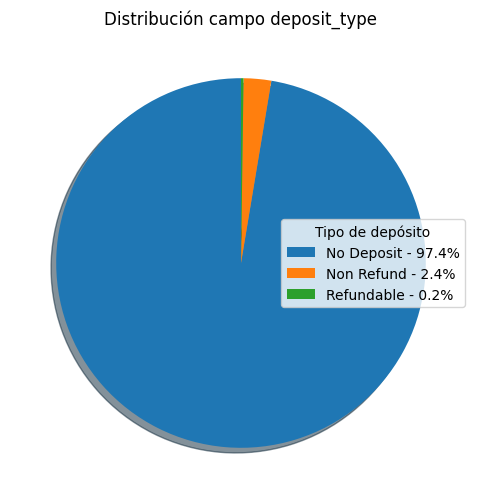

In [13]:
# Calculating the relative frecuency of accommodations offered
reservation_df_clean["deposit_type"].replace("No Refund","Non Refund",inplace=True)
# Conteo de valores
counts=reservation_df_clean["deposit_type"].value_counts()
percentages=reservation_df_clean["deposit_type"].value_counts(dropna=False, normalize=True)*100
# Crear etiquetas combinando categoría + porcentaje
labels = [f"{cat} - {perc:.1f}%" for cat, perc in zip(counts.index, percentages)]

# Crear el pie chart sin etiquetas
plt.figure(figsize=(6, 6))
plt.pie(counts, startangle=90, shadow=True)
# Agregar leyenda
plt.legend(labels, title="Tipo de depósito", loc="best")
plt.ylabel("")  # Quita etiqueta del eje Y
plt.title("Distribución campo deposit_type")
plt.show()


Cerca del 88% de los clientes no hacen un depositivo para realizar una reserva. El 10% de los clientes hacen el depositivo del 100%, pero no se devuelve si cancela. Y muy pocos clientes hacen un depositivo por un valor por debajo del costo de la reserva.

#### Variable is_canceled

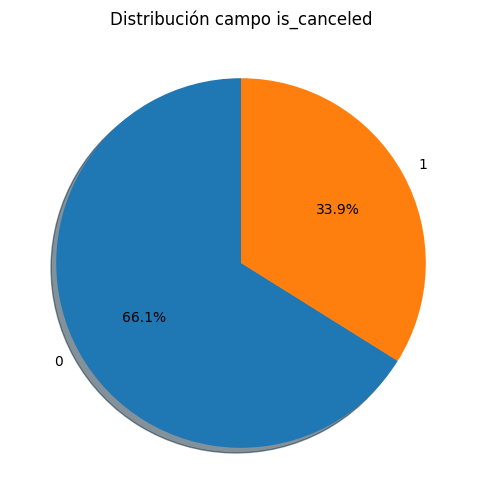

In [14]:
# obtain unique values, count, most repeat value
reservation_df_clean["is_canceled"].describe()
# Calculo frecuencias relativas 
reservation_df_clean["is_canceled"].value_counts(dropna=False, normalize=True)
# Graficando distribucion campo is_canceled
reservation_df_clean["is_canceled"].value_counts().plot.pie(
    autopct='%1.1f%%',   # Muestra porcentajes
    figsize=(6, 6),      # Tamaño del gráfico
    startangle=90,       # Rotación inicial
    shadow=True          # Sombra opcional
)
plt.ylabel("")  # Quita la etiqueta del eje Y
plt.title("Distribución campo is_canceled")
plt.show()

El 66.1% de los registros corresponden a reservas exitosas, y el 33.9% de reservas canceladas. 
El procentaje de cancelaciones es alto, significando una tercera parte del total de reservas
por lo que mas adelante se analizará que factores lleva a que exista tantas cancelaciones

#### Variable lead_time

In [15]:
# Calculando el rango intercuartilico
q1=reservation_df["lead_time"].quantile(0.25)
q3=reservation_df["lead_time"].quantile(0.75)
iqr=q3-q1

# obteniendo prinicpales metricas como la mediana, los percentiles, completitud del campo
reservation_df["lead_time"].describe()

count    58895.000000
mean       100.050904
std        101.162420
min          0.000000
25%         17.000000
50%         69.000000
75%        157.000000
max        737.000000
Name: lead_time, dtype: float64


Mean = 100 → en promedio los alojamientos se reservan (incluye las reservas exitosas y canceladas) con 100 dias 
de anticipación (mas de 3 meses de anticipación)
- Q1 (25%) = 17          → El 25% de los alojamientos se reservan con 17 dias de antelación o menos
- Q2 (50%, mediana) = 69 → El 50% de los alojamientos se reservan con 69 dias de antelación o menos
- Q3 (75%) = 157         → El 75% de los alojamientos se reservan con 157 dias de antelación o menos

Rango intercuartílico (IQR):
- IQR= Q3 - Q1 = 140
- Límite inferior = Q1 - 1.5 × IQR = 17- 1.5*140  = 0    
- Límite superior = Q3 + 1.5 × IQR = 157+1.5*140  = 367

Entonces, alojamientos que son reservados con una antelacion ≥ 367 dias, se consideran valores atipicos

[]

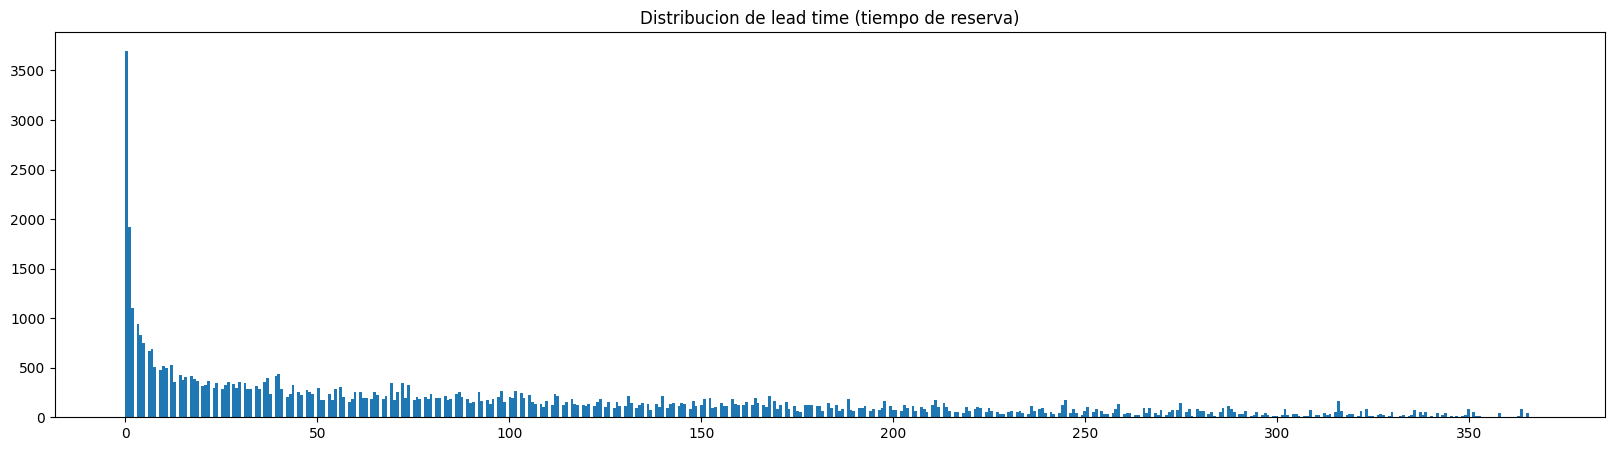

In [16]:
# graficando histograma para analizar la distribucion de la variable lead_time
plt.figure(figsize=(20, 5))
plt.hist(reservation_df.loc[reservation_df["lead_time"] <= (q3 + 1.5 * iqr)]["lead_time"], bins=500)
plt.title("Distribucion de lead time (tiempo de reserva)")
plt.plot()

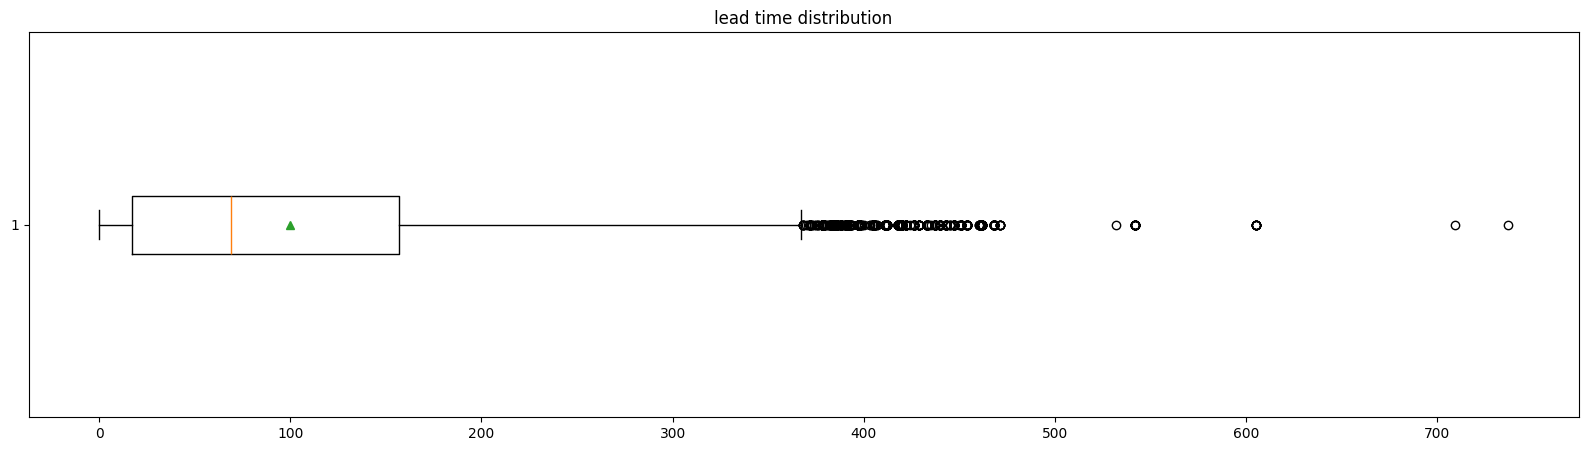

In [17]:

# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(reservation_df["lead_time"], showmeans=True, vert=False)
plt.title("lead time distribution")
plt.show()

La media (triangulo verde) que es 100 esta no tan cerca de la mediana que es 69 dias (linea naranja ), por lo que existe una ligera asimetría positiva en la distribución, causada por la presencia de valores atípicos positivos grandes que están empujando la media hacia la derecha . Asimismo, los valores atipicos empiezan por encima de los 367 dias y se extienden hasta valores muy grandes ( 700 dias). La mayoria de los dias de antelacion de reserva (rango intercuartilico  Q3 - Q1), están entre 17 y 160 dias, lo que representa el comportamiento típico de los clientes.

In [18]:
# Asimetría
skewness = reservation_df["lead_time"].skew()
# Curtosis
kurtosis = reservation_df["lead_time"].kurt()
print("Asimetría (skewness):", skewness)
print("Curtosis:", kurtosis)

Asimetría (skewness): 1.2082573004591315
Curtosis: 1.0087856167757177


Como la asimetria arroja un valor positivo mayor a 1, nos confirma que distribución esta sesgada hacia la derecha. Entonces, existen unos valores positivos muy grandes que estan arrastrando la media hacia la derecha.
También, como la curtosis es cercano a uno la variable está sesgada a la derecha y presenta una concentración central fuerte con algunos valores atípicos altos que le dan colas más pesadas.

# 2. Estrategia de análisis

La estrategia de análisis comienza con un proceso riguroso de validación y limpieza de los datos de reservas, con el objetivo de garantizar la calidad y consistencia de la información. Esta fase incluye la identificación y eliminación de valores duplicados, el tratamiento de valores nulos, la estandarización y transformación de tipos de datos, y la verificación de la coherencia en las variables categóricas y numéricas. Posteriormente, se plantea un análisis univariado orientado a comprender la estructura y comportamiento de las variables seleccionadas. Este análisis se dividirá en dos enfoques. Variables cualitativas (categóricas) y Variables cuantitativas (numéricas). Para el primer caso, se aplicarán tablas de frecuencias absolutas y relativas para cuantificar la distribución de categorías. Se emplearán gráficos de pastel (pie charts) y, en algunos casos, barras, con el fin de representar visualmente la proporción de cada categoría. Para el segundo caso, se analizarán mediante medidas de tendencia central (media, mediana, moda) y dispersión (desviación estándar, rango, cuartiles). Se utilizarán histogramas para identificar la forma de la distribución (simetría, sesgo, curtosis) y boxplots para detectar valores atípicos (outliers) y contrastar la dispersión de los datos.

Posteriormente, el análisis se orientará en dos enfoques complementarios: el primero es la caracterización de los clientes que se hospedan, se buscará identificar las principales características de los clientes, las temporadas con mayor nivel de ocupación, los tipos de reserva más frecuentes y otros patrones relevantes. El propósito de este análisis es construir un perfil del cliente que permita generar recomendaciones estratégicas para incrementar la atracción y retención de huéspedes. El segundo enfoque es el análisis de cancelaciones. Se evaluarán las principales causas asociadas a las cancelaciones, identificando el perfil de los clientes que cancelan con mayor frecuencia y las circunstancias que rodean dichas decisiones. A partir de ello, se propondrán estrategias para reducir la tasa de cancelación, mitigando su impacto en la ocupación y en los ingresos del hotel. Ambos enfoques se desarrollarán mediante análisis bivariado, apoyado en herramientas gráficas como line charts (para tendencias temporales), diagramas de Pareto (para jerarquizar causas o categorías más influyentes) y boxplots segmentados por categorías (para explorar la variabilidad y presencia de valores atípicos entre distintos grupos de clientes).

# 3. Desarrollo de la estrategia

### Perfilamiento reserva efectiva

C:\Users\Diego\AppData\Local\Temp\ipykernel_21448\3197880223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkout_df["days_of_accommodation"]=(checkout_df["stays_in_week_nights"] + checkout_df["stays_in_weekend_nights"])
C:\Users\Diego\AppData\Local\Temp\ipykernel_21448\3197880223.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkout_df["date_check-in"]=checkout_df["reservation_status_date"]-pd.to_timedelta(checkout_df["days_of_accommodation"], unit="D")
C:\Users\Diego\AppData\Local\Temp\ipyk

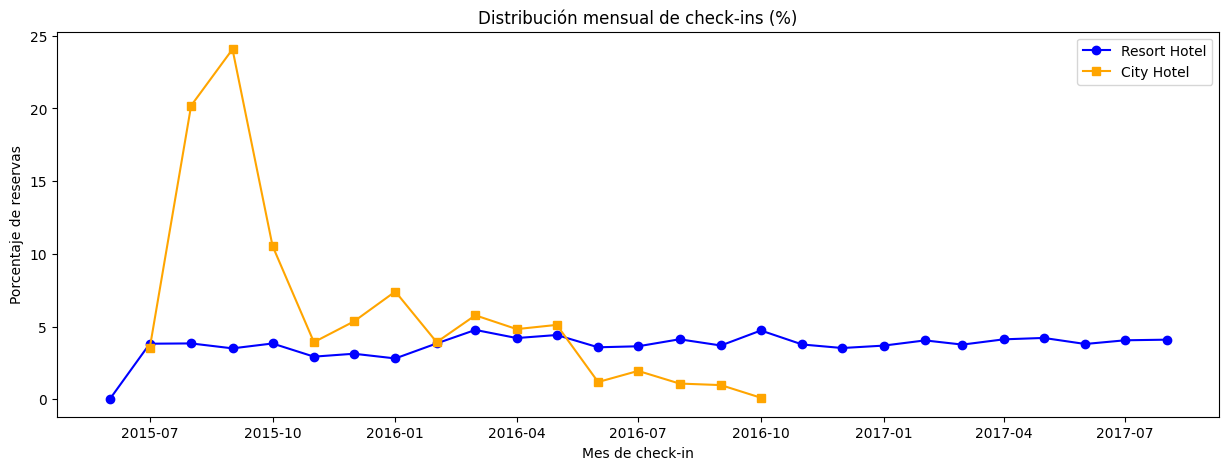

In [6]:
# Filtrar solo huéspedes que completaron su estadía
checkout_df= reservation_df_clean[reservation_df_clean["reservation_status"] == "Check-Out"]
# obtiene los dias de alojamiento
checkout_df["days_of_accommodation"]=(checkout_df["stays_in_week_nights"] + checkout_df["stays_in_weekend_nights"])
# obtiene la fecha de check-in
checkout_df["date_check-in"]=checkout_df["reservation_status_date"]-pd.to_timedelta(checkout_df["days_of_accommodation"], unit="D")
# truncar la fecha del check-in al primer dia del mes para realizar analisis
checkout_df["date_check-in_truncate_month"] = checkout_df["date_check-in"].dt.to_period("M").dt.to_timestamp()
checkin_counts_resort = checkout_df[checkout_df["hotel"]=="Resort Hotel"]["date_check-in_truncate_month"].value_counts(normalize=True).sort_index() * 100
checkin_counts_hotel= checkout_df[checkout_df["hotel"]=="City Hotel"]["date_check-in_truncate_month"].value_counts(normalize=True).sort_index() * 100
plt.figure(figsize=(15,5))

# Línea para Resort Hotel
plt.plot(checkin_counts_resort.index, checkin_counts_resort.values, 
         marker="o", linestyle="-", color="blue", label="Resort Hotel")

# Línea para City Hotel
plt.plot(checkin_counts_hotel.index, checkin_counts_hotel.values, 
         marker="s", linestyle="-", color="orange", label="City Hotel")

# Personalización
plt.title("Distribución mensual de check-ins (%)")
plt.xlabel("Mes de check-in")
plt.ylabel("Porcentaje de reservas")
plt.legend()
plt.show()

La anterior corresponde a la tendencia en el tiempo de las reservas exitosas para los dos tipos de hoteles. Si se compara el intervalo de fechas entre julio de 2015 y octubre de 2015, se observa que  "City hotel" tuvo un pico de demanda de hospedaje cercano al 25% del total de reservas. "Resort Hotel" entre dichos meses  tuvo un valor constante de comportamiento cercano al 5% del total de reservas. Apartir de alli , el comportamiento referente a demanda de hospedaje de los 2 hoteles estuvo similar y en un valor cercano al 5 % del total de reservas. 

In [7]:

# Cuales son los el perfil del cliente que se hospeda en los hoteles
checkout_df[["adults","children","babies"]].value_counts(dropna=False, normalize=True)

adults  children  babies
2       0         0         0.674903
1       0         0         0.194554
2       1         0         0.033653
        2         0         0.030156
3       0         0         0.030022
                              ...   
87      0         0         0.000034
92      0         0         0.000034
89      0         0         0.000034
93      0         0         0.000034
98      0         0         0.000034
Name: proportion, Length: 114, dtype: float64

El anterior analisis permite indicar los principales atributos del cliente que se hospedo:  
- 67% de las reservas se hicieron para unicamente 2 adultos.
- 19% de las reservas se hicieron para unicamente un adulto. 
- Cerca del 3% fue para 2 adultos y 1 niño.

In [8]:
checkout_df[["stays_in_weekend_nights","stays_in_week_nights"]].value_counts(dropna=False, normalize=True)*100

stays_in_weekend_nights  stays_in_week_nights
0                        1                       17.243234
2                        5                       13.948563
0                        2                       10.079005
                         3                        6.118675
1                        0                        4.989074
                                                   ...    
13                       33                       0.003362
14                       34                       0.003362
16                       40                       0.003362
18                       42                       0.003362
19                       50                       0.003362
Name: proportion, Length: 67, dtype: float64

- El 17% de los clientes exitosos, se quedan 1 dias entre semana, lo que evidencia que las estadías cortas son las más frecuentes. Este comportamiento puede estar asociado a viajes de negocios, estancias de tránsito o visitas rápidas.
- Enseguida, el 13 % de los clientes se quedan una semana completa (5 noches entre semana + 2 noches los fines de semana).Esto refleja un segmento de huéspedes con mayor planificación, probablemente turistas o familias que buscan aprovechar tanto los días laborales como los fines de semana. 
- Luego, cerca del 10 % se queda 3 dias entre semana. Asimismo, cerca tambien del 9% se queda 3 dias en la semana (2 noches entre semana y una noche los fines de semana).  
En conclusión, el patrón predominante son las estancias cortas, con una participación relevante también de estancias de 1 semana completa

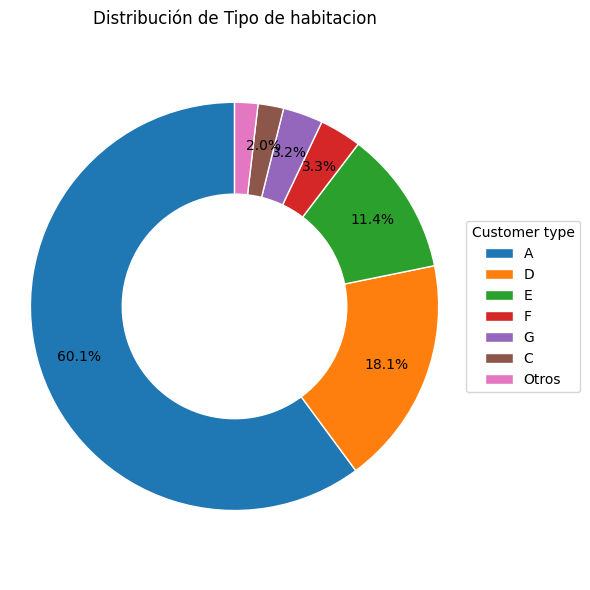

In [9]:
checkout_df["reserved_room_type"].value_counts(dropna=False, normalize=True)*100

# Serie de porcentajes
s = checkout_df["reserved_room_type"].value_counts(dropna=False, normalize=True).mul(100)
s = s.rename(index={np.nan: "Desconocido"}).sort_values(ascending=False)

# Agrupa categorías pequeñas
umbral = 2.0
grandes = s[s >= umbral]
otros = s[s < umbral].sum()
if otros > 0:
    grandes.loc["Otros"] = otros

# Función para mostrar % solo si supera umbral
def autopct_fmt(p):
    return f"{p:.1f}%" if p >= umbral else ""

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    grandes.values,
    labels=None,                # labels en la leyenda, no en el gráfico
    autopct=autopct_fmt,
    startangle=90,
    pctdistance=0.8,
    wedgeprops={"width": 0.45, "edgecolor": "white"}  # donut y borde limpio
)

# Leyenda fuera para no encimar
ax.legend(
    wedges,
    grandes.index.tolist(),
    title="Customer type",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

ax.set_title("Distribución de Tipo de habitacion")
ax.set_ylabel("")
ax.axis("equal")
plt.tight_layout()
plt.show()

El tipo de habitacion A es la mas solicitada por el cliente que se hospedo satisfactoriamente (cerca del 60%) y como de anteriores análisis se sabe que las el 73.7% de las reservas se hicieron para 2 adultos, se puede inferir que el tipo de habitacion A es para máximo 2 personas. El 18% de los clientes se hospedan en la habitacion tipo D y el 11% en el tipo E. Lo anterior nos indica que las habitaciones para maximo 2 personas son las mas reservadas.

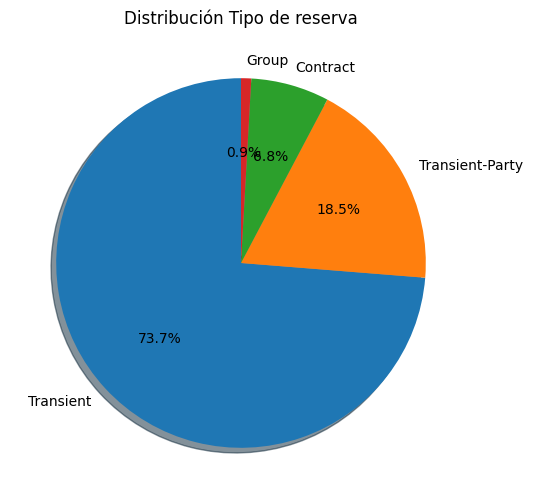

In [10]:
checkout_df["customer_type"].value_counts(dropna=False, normalize=True)*100
# Graficando frecuencias relativas variable reservation_status
checkout_df["customer_type"].value_counts().plot.pie(
    autopct='%1.1f%%',   # Muestra porcentajes
    figsize=(6, 6),      # Tamaño del gráfico
    startangle=90,       # Rotación inicial
    shadow=True          # Sombra opcional
)

plt.ylabel("")  # Quita la etiqueta del eje Y
plt.title("Distribución Tipo de reserva")
plt.show()

El anterior analisis nos da mas pista acerca del perfil del cliente que tuvo con exito un hospedaje. Por ejemplo, cerca del 72% del cliente hizo una reserva tipo contract (es una reserva individual, sin relación con contratos ni grupos).Esto refleja que el hotel recibe principalmente clientes independientes, como viajeros de negocios o turistas que reservan por cuenta propia. Cerca del 18 % fue una reserva tipo Transient-party (reserva individual (transient), pero está ligada a otra reserva individual), este segmento muestra que existe una proporción relevante de clientes que viajan en pequeños grupos informales. Finalmente, cerca del 6% es de tipo Contract (La reserva hace parte de un contrato o convenio entre el hotel y una empresa, agencia de viajes, aerolínea). Y menos del 1% es de tipo Group (reserva está asociada a un grupo de personas que viajan juntas)

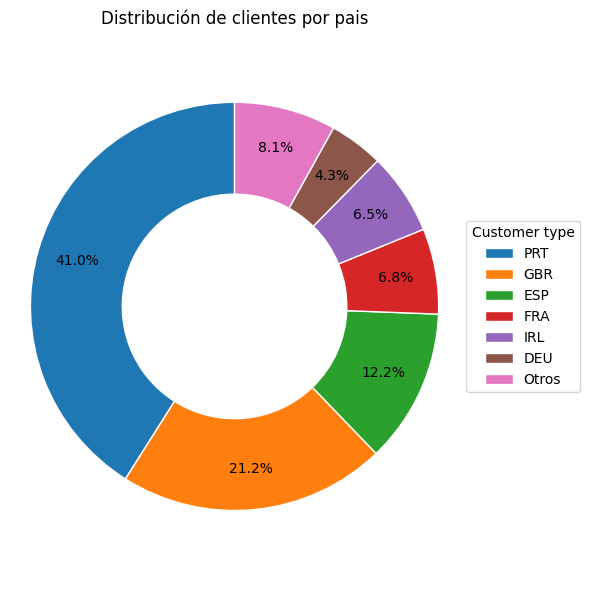

In [11]:
checkout_df["country"].value_counts(normalize=True).head(10) * 100


s = checkout_df["country"].value_counts(normalize=True).head(10) * 100
s = s.rename(index={np.nan: "Desconocido"}).sort_values(ascending=False)

# Agrupa categorías pequeñas
umbral = 2.0
grandes = s[s >= umbral]
otros = s[s < umbral].sum()
if otros > 0:
    grandes.loc["Otros"] = otros

# Función para mostrar % solo si supera umbral
def autopct_fmt(p):
    return f"{p:.1f}%" if p >= umbral else ""

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    grandes.values,
    labels=None,                # labels en la leyenda, no en el gráfico
    autopct=autopct_fmt,
    startangle=90,
    pctdistance=0.8,
    wedgeprops={"width": 0.45, "edgecolor": "white"}  # donut y borde limpio
)

# Leyenda fuera para no encimar
ax.legend(
    wedges,
    grandes.index.tolist(),
    title="Customer type",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

ax.set_title("Distribución de clientes por pais")
ax.set_ylabel("")
ax.axis("equal")
plt.tight_layout()
plt.show()

Cerca del 80% del total de las reservas efectivas provienen del top 4 de paises de origen de los clientes y son: Portugal (41 %), Reino Unido (21.2%), España (12.2%), y Francia (6.8%). Se recomienda focalizar estrategias comerciales en esos 4 países porque representan gran parte del mercado de hospedaje, al tiempo que se exploran oportunidades de crecimiento en mercados de menor participación como Irlanda, Alemania, entre otros.

In [12]:
checkout_df[["meal"]].value_counts(dropna=False, normalize=True)*100

meal     
BB           79.569676
HB           16.678433
Undefined     1.489326
SC            1.391831
FB            0.870735
Name: proportion, dtype: float64

El 79% de los clientes que se hospedaron selecciono un modelo de comidas BB (Bed & Breakfast), es decir, hospedaje mas desayuno. El 16% lo hizo con un modelo HB (Half board), es decir, hospedaje mas desayuno y usulamente la cena.

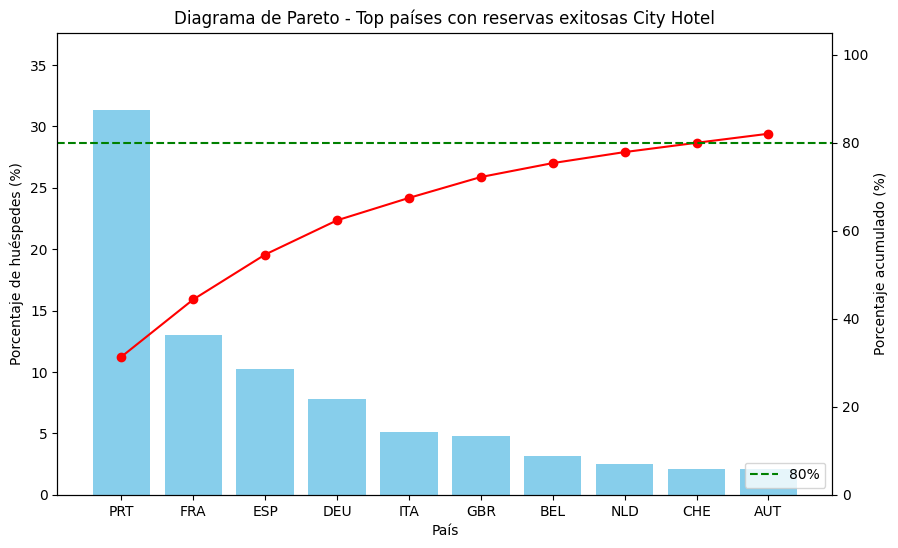

In [13]:
# --- Top países (ya normalizado en proporción con normalize=True) ---
#hotel= checkout_df[checkout_df["hotel"]=="City Hotel"]["date_check-country"].value_counts(normalize=True).sort_index() * 100

top_countries = checkout_df[checkout_df["hotel"]=="City Hotel"]["country"].value_counts(normalize=True).head(10) * 100

# Calcular acumulado
cum_values = top_countries.cumsum()

# Crear figura
fig, ax1 = plt.subplots(figsize=(10,6))

# Barras (frecuencia relativa en %)
ax1.bar(top_countries.index, top_countries.values, color="skyblue")
ax1.set_ylabel("Porcentaje de huéspedes (%)")
ax1.set_xlabel("País")
ax1.set_title("Diagrama de Pareto - Top países con reservas exitosas City Hotel")
ax1.set_ylim(0, top_countries.max() * 1.2)

# Eje secundario para acumulado
ax2 = ax1.twinx()
ax2.plot(top_countries.index, cum_values.values, color="red", marker="o", linestyle="-")
ax2.set_ylabel("Porcentaje acumulado (%)")
ax2.set_ylim(0, 105)  # hasta 100%

# Línea horizontal en 80%
ax2.axhline(80, color="green", linestyle="--", label="80%")
ax2.legend(loc="lower right")

plt.show()


Segun el diagrama de Bareto, cerca del 80% del total de las reservas exitosas(punto donde se intersecta la linea roja que representa el acomulado de la cantidad de reservas por pais de origen del cliente con la linea verde que representa el 80% del total de las reservas)  provienen del top 9 de paises de origen de los clientes y son: Portugal (31.35 %), Francia (13%), España (10.2%), Alemania (7.7%), Italia(5), Reino Unido (17.88%), Belgica (3.1%), Paises bajos (2.5%), Suiza (2.1%) y Austria (2%) . 
Se recomienda focalizar estrategias comerciales en Portugal, Francia y España, que en conjunto representan más del 50% de las reservas, al tiempo que se exploran oportunidades de crecimiento en mercados de menor participación como Suiza y Austria."

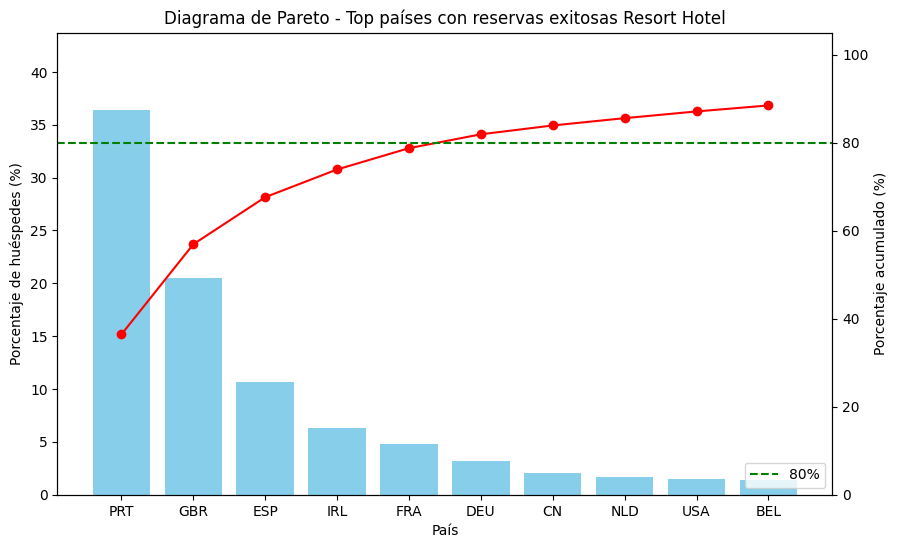

In [14]:
top_countries = checkout_df[checkout_df["hotel"]=="Resort Hotel"]["country"].value_counts(normalize=True).head(10) * 100

# Calcular acumulado
cum_values = top_countries.cumsum()

# Crear figura
fig, ax1 = plt.subplots(figsize=(10,6))

# Barras (frecuencia relativa en %)
ax1.bar(top_countries.index, top_countries.values, color="skyblue")
ax1.set_ylabel("Porcentaje de huéspedes (%)")
ax1.set_xlabel("País")
ax1.set_title("Diagrama de Pareto - Top países con reservas exitosas Resort Hotel")
ax1.set_ylim(0, top_countries.max() * 1.2)

# Eje secundario para acumulado
ax2 = ax1.twinx()
ax2.plot(top_countries.index, cum_values.values, color="red", marker="o", linestyle="-")
ax2.set_ylabel("Porcentaje acumulado (%)")
ax2.set_ylim(0, 105)  # hasta 100%

# Línea horizontal en 80%
ax2.axhline(80, color="green", linestyle="--", label="80%")
ax2.legend(loc="lower right")

plt.show()


Segun el diagrama de Bareto para Resort Hotel, cerca del 80% del total de las reservas exitosas(punto donde se intersecta la linea roja que representa el acomulado de la cantidad de reservas por pais de origen del cliente con la linea verde que representa el 80% del total de las reservas)  provienen del top 6 de pais de origen de los clientes y son: Portugal (36 %), Reino Unido (20%), España (10%),  Irlanda (6.29%), Francia (4.84%), y Alemania (3.15%). Por lo tanto, Se recomienda focalizar estrategias en Portugal, Reino Unido y España pues representan cerca del 66% del total de reservas, mientras se buscan estrategias para aumentar la participacion en mercados como Irlanda, Francia, Alemania, entre otros,

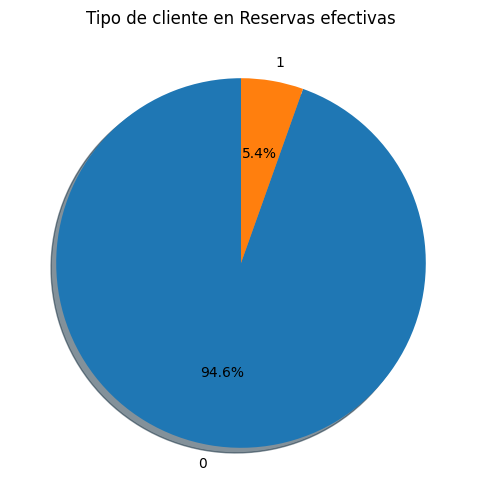

In [15]:
checkout_df["is_repeated_guest"].value_counts(dropna=False, normalize=True)*100
# Calcular proporciones
counts = checkout_df["is_repeated_guest"].value_counts(dropna=False, normalize=True)*100

# Graficar
counts.plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    startangle=90,
    shadow=True
)

plt.ylabel("")  # Quita etiqueta eje Y
plt.title("Tipo de cliente en Reservas efectivas")
plt.show()

La mayoría de los clientes que se hospedaron de forma satisfactoria son nuevos (aproximadamente el 94%), mientras que solo un 5.44% corresponde a clientes recurrentes. Este resultado evidencia una gran oportunidad para fortalecer las políticas de retención de clientes, sin descuidar las estrategias de atracción de nuevos huéspedes que ya muestran un desempeño positivo.

### Perfilamiento reserva cancelada

C:\Users\Diego\AppData\Local\Temp\ipykernel_21448\3096912051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_df["date_canceled_truncate_month"] = canceled_df["reservation_status_date"].dt.to_period("M").dt.to_timestamp()


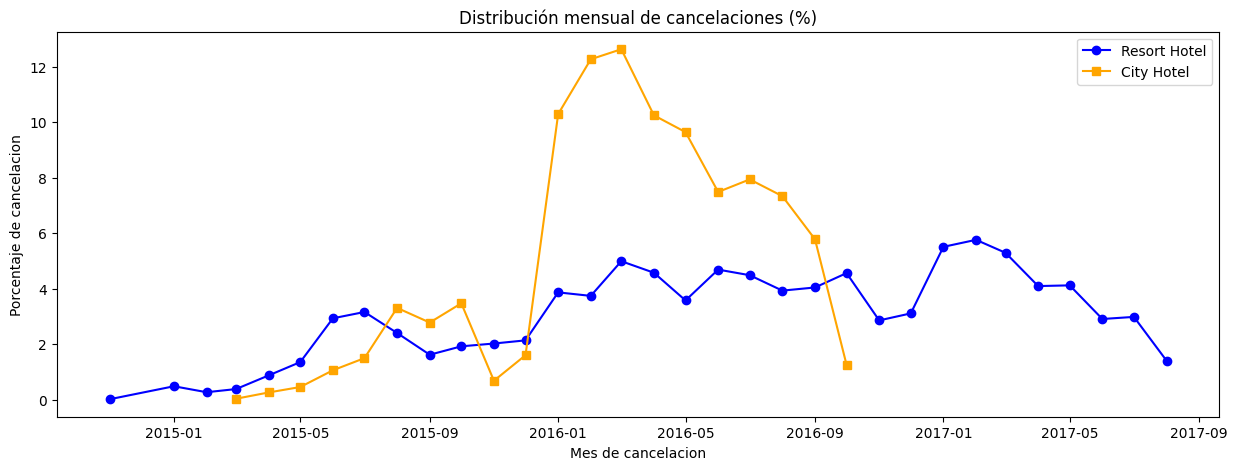

In [16]:
# Filtrar solo huéspedes que cancelaron su estadía
canceled_df= reservation_df_clean[reservation_df_clean["reservation_status"] == "Canceled"]

# truncar la fecha del cancelamiento al primer dia del mes para realizar analisis
canceled_df["date_canceled_truncate_month"] = canceled_df["reservation_status_date"].dt.to_period("M").dt.to_timestamp()
canceled_df_resort = canceled_df[canceled_df["hotel"]=="Resort Hotel"]["date_canceled_truncate_month"].value_counts(normalize=True).sort_index() * 100
canceled_df_hotel= canceled_df[canceled_df["hotel"]=="City Hotel"]["date_canceled_truncate_month"].value_counts(normalize=True).sort_index() * 100
plt.figure(figsize=(15,5))

# Línea para Resort Hotel
plt.plot(canceled_df_resort.index, canceled_df_resort.values, 
         marker="o", linestyle="-", color="blue", label="Resort Hotel")

# Línea para City Hotel
plt.plot(canceled_df_hotel.index, canceled_df_hotel.values, 
         marker="s", linestyle="-", color="orange", label="City Hotel")

# Personalización
plt.title("Distribución mensual de cancelaciones (%)")
plt.xlabel("Mes de cancelacion")
plt.ylabel("Porcentaje de cancelacion")
plt.legend()
plt.show()

En "city hotel "existe un pico de cancelaciones de reservas entre febrero de 2016 y septiembre de 2016. Por otro lado, en el "resort hotel", no se presentan picos abruptos  de cancelaciones aunque hay oscilaciones, las cancelaciones se mantienen en valores más bajos (entre 1% y 6% del total de cancelaciones), sin picos extremos.
City Hotel es más vulnerable a fluctuaciones en las cancelaciones, probablemente por la naturaleza de su clientela (viajes de negocio, estancias cortas, mayor dependencia de la coyuntura económica o eventos puntuales). Resort Hotel mantiene una estabilidad relativa, sugiriendo una clientela más comprometida con sus reservas.

In [17]:
# Cuales son los el perfil del cliente que se hospeda en los hoteles
canceled_df[["adults","children","babies"]].value_counts(dropna=False, normalize=True)*100

adults  children  babies
2       0         0         67.743932
1       0         0         11.840748
2       2         0          6.601114
3       0         0          5.274015
2       1         0          4.283848
                              ...    
86      0         0          0.006876
91      0         0          0.006876
92      0         0          0.006876
98      0         0          0.006876
100     0         0          0.006876
Name: proportion, Length: 99, dtype: float64

El anterior analisis permite indicar los principales atributos del cliente que se hospedo:  
- 67% de las reservas canceladas se hicieron para 2 adultos
- 11% de las reservas canceladas se hicieron para 1 adulto 
- Cerca del 6% de las reservas canceladas fue para 2 adultos y 2 niños

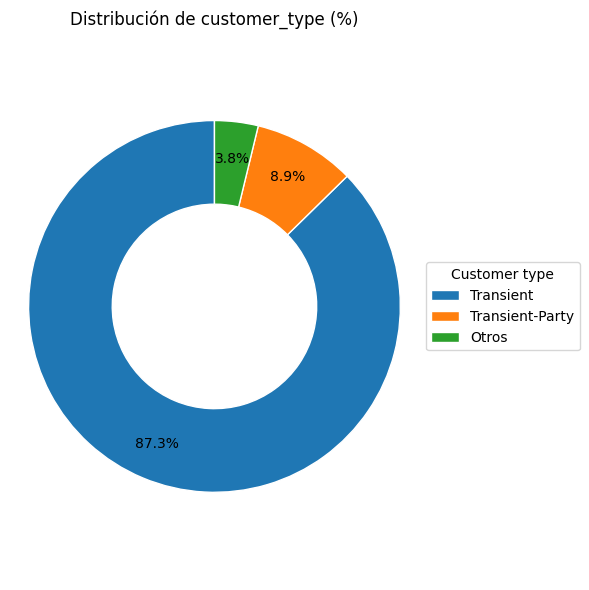

In [18]:
canceled_df["customer_type"].value_counts(dropna=False, normalize=True)*100

s = canceled_df["customer_type"].value_counts(dropna=False, normalize=True).mul(100)
s = s.rename(index={np.nan: "Desconocido"}).sort_values(ascending=False)

# Agrupa categorías pequeñas
umbral = 2.0
grandes = s[s >= umbral]
otros = s[s < umbral].sum()
if otros > 0:
    grandes.loc["Otros"] = otros

# Función para mostrar % solo si supera umbral
def autopct_fmt(p):
    return f"{p:.1f}%" if p >= umbral else ""

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    grandes.values,
    labels=None,                # labels en la leyenda, no en el gráfico
    autopct=autopct_fmt,
    startangle=90,
    pctdistance=0.8,
    wedgeprops={"width": 0.45, "edgecolor": "white"}  # donut y borde limpio
)

# Leyenda fuera para no encimar
ax.legend(
    wedges,
    grandes.index.tolist(),
    title="Customer type",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

ax.set_title("Distribución de customer_type (%)")
ax.set_ylabel("")
ax.axis("equal")
plt.tight_layout()
plt.show()

La mayoria de cancelaciones se realizan sobre el tipo Transient (cerca del 87%). Lo que nos indica que los clientes que mayoritariamente cancelaron hacen viajes independientes o de pequeños grupos familiares/amigos (Transient y Transient-Party). En contraste, los clientes Contract y Group muestran una tasa de cancelación mucho menor, lo que refleja un mayor nivel de compromiso debido a acuerdos corporativos o reservas organizadas.


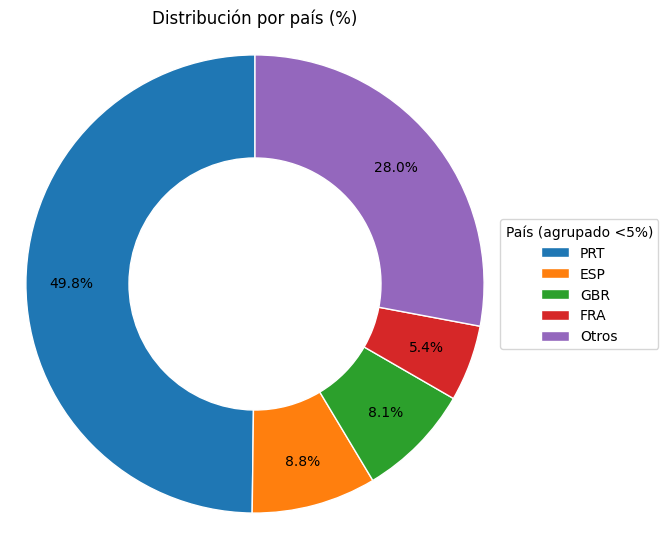

In [19]:
canceled_df["country"].value_counts(dropna=False, normalize=True)*100

s = (canceled_df["country"]
     .astype("object").fillna("Desconocido")
     .value_counts(normalize=True)
     .mul(100).sort_values(ascending=False))

umbral = 5.0
grandes = s[s >= umbral]
otros = s[s < umbral].sum()
if otros > 0:
    grandes.loc["Otros"] = otros

def autopct_fmt(p): 
    return f"{p:.1f}%" if p >= umbral else ""

fig, ax = plt.subplots(figsize=(7,5.6))
wedges, texts, autotexts = ax.pie(
    grandes.values,
    labels=None,
    autopct=autopct_fmt,
    startangle=90,
    pctdistance=0.8,
    wedgeprops={"width": 0.45, "edgecolor": "white"}
)

ax.set_title("Distribución por país (%)", pad=6)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + 0.02, 0.70, 0.90])
ax.legend(wedges, grandes.index.tolist(),
          title="País (agrupado <5%)",
          loc="center left", bbox_to_anchor=(1.0, 0.5), borderaxespad=0)
ax.set_ylabel("")
ax.axis("equal")
plt.show()

La demanda cancelada está altamente concentrada en Portugal (PRT, 49.8%), seguido por España (ESP, 8.8%), Reino Unido (GBR, 8.1%) y Francia (FRA, 5.4%). El resto de países, cada uno con participación <5%, se agrupan como “Otros” (28%), evidenciando una larga cola de orígenes con baja representación individual.

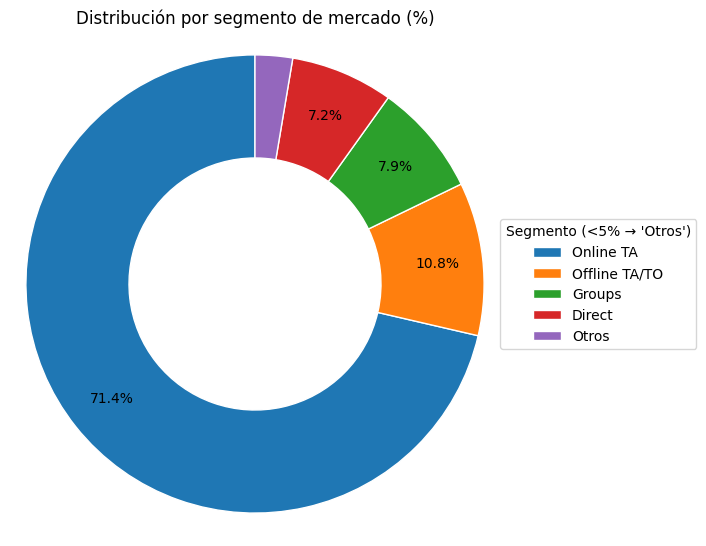

In [20]:
s = (canceled_df["market_segment"]
     .astype("object").fillna("Desconocido")
     .value_counts(normalize=True)
     .mul(100).sort_values(ascending=False))

umbral = 5.0
grandes = s[s >= umbral]
otros = s[s < umbral].sum()
if otros > 0:
    grandes.loc["Otros"] = otros

def autopct_fmt(p):
    return f"{p:.1f}%" if p >= umbral else ""

fig, ax = plt.subplots(figsize=(7,5.6))
wedges, _, _ = ax.pie(
    grandes.values,
    labels=None,
    autopct=autopct_fmt,
    startangle=90,
    pctdistance=0.8,
    wedgeprops={"width": 0.45, "edgecolor": "white"}
)

ax.set_title("Distribución por segmento de mercado (%)", pad=6)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + 0.02, 0.70, 0.90])
ax.legend(wedges, grandes.index.tolist(),
          title="Segmento (<5% → 'Otros')",
          loc="center left", bbox_to_anchor=(1.0, 0.5), borderaxespad=0)
ax.set_ylabel("")
ax.axis("equal")
plt.show()

In [21]:
canceled_df[["is_repeated_guest","previous_cancellations"]].value_counts(dropna=False, normalize=True)*100

is_repeated_guest  previous_cancellations
0                  0                         97.352678
                   1                          1.939077
1                  1                          0.288799
0                  2                          0.123771
1                  0                          0.068762
0                  3                          0.034381
                   24                         0.034381
1                  3                          0.027505
                   2                          0.027505
0                  25                         0.020628
                   19                         0.020628
1                  4                          0.020628
0                  26                         0.020628
                   14                         0.013752
1                  5                          0.006876
Name: proportion, dtype: float64

La mayoria de clientes que cancelan son clientes nuevos y no tienen anteriores cancelaciones.

In [22]:
reservation_df.groupby(["is_canceled","reservation_status"]).size().reset_index(name="count")

,is_canceled,reservation_status,count
0,0,Check-Out,34291
1,1,Canceled,23218
2,1,No-Show,797


Aca podemos observar que cuando el estatus de la reserva es "No-Show" (usuario no hizo check-in e informo al hotel la razon), entran en la categoria de cancelados. Entonces existen 2 posibles cancelaciones por parte del usuario, una donde simplemente cancelo la reserva con anticipacion y la otra que cancelo despúes de haber cumplido el plazo del check-in e informo al hotel la razon (Esta razón pareciera que fue por algun inconveniente de ultimo momento del cliente). Por lo tanto, se tiene dos categorias dentro de las cancelaciones:  
- Cancelaciones anticipadas (son cerca del 97%)
- Cancelaciones tarde (son cerca del 3%)  
Como las cancelaciones tardias corresponden a un valor pequeño, se manejaran todas las cancelaciones como anticipadas.

C:\Users\Diego\AppData\Local\Temp\ipykernel_21448\3991685909.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, showmeans=True, vert=False, labels=["Reservas exitosas (Check-Out)", "Reservas canceladas"])


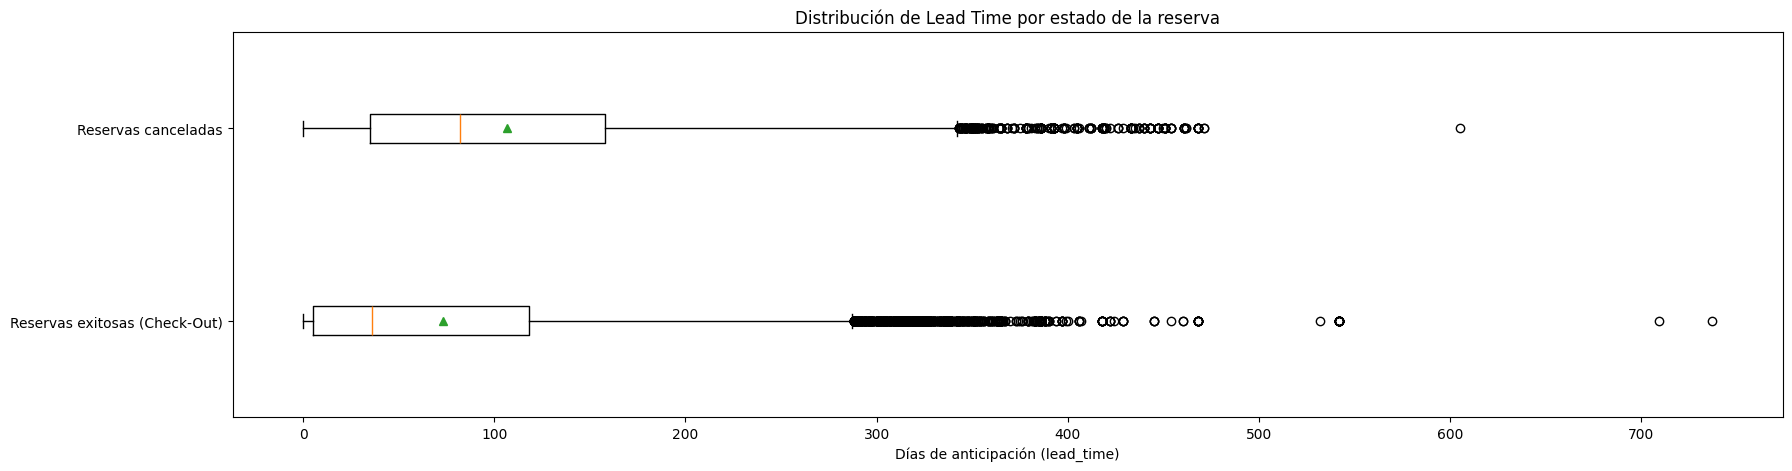

In [23]:

plt.figure(figsize=(20, 5))

# Crear lista con los dos conjuntos de datos
data = [checkout_df["lead_time"], canceled_df["lead_time"]]

# Graficar boxplot
plt.boxplot(data, showmeans=True, vert=False, labels=["Reservas exitosas (Check-Out)", "Reservas canceladas"])

plt.title("Distribución de Lead Time por estado de la reserva")
plt.xlabel("Días de anticipación (lead_time)")
plt.show()


El promedio de dias de antelación con la que un cliente exitoso hace la reserva comparado con un cliente que cancela es menor, es decir, un usuario exitoso en promedio reserva con menos dias de antelacion que el usuario que cancela (75 y 140 dias respectivamente). Asimismo, el 50% de las reservas del cliente exitoso ocurren entre 20 y 130 dias, mientras que el usuario que cancela esta entre 50 y 200 dias. Existe valores atipicos positivos en ambos casos, lo cual hace que existe una asimetria positiva y arrastra la media hacia la derecha, por encima de la mediana. 

## Prueba de hipotesis chi2


Para utilizar esta pprueba de hipotesis se aseguro:
- Ambas variables a comparar son categoricas  
- Cada observacion debe pertenecer a una sola celda de la tabla de contingencia
- Los datos deben estar en frecuencias absolutas (conteos), no en porcentajes ni promedios.

**Step 1.** Define null and alternative hypothesis:

$$
H_0: \text{The variables are not dependent}
$$
$$
H_a: \text{The variables are dependent}
$$ 


- variable 1= rangos dias de anticipacion (variable cualitativa ordinal)
- variable 2= cancelacion (variable cualitativa diacotómica)

In [55]:
bins   = [0, 30, 60, 90, 180, 365, reservation_df_clean["lead_time"].max()]
labels = ["0-30", "31-60", "61-90", "91-180", "181-365", "365+"]

reservation_df_clean["lead_time_bin"] = pd.cut(
    reservation_df_clean["lead_time"], bins=bins, labels=labels, include_lowest=True, ordered=True
)

contingency_table = pd.crosstab(
    reservation_df_clean["lead_time_bin"],
    reservation_df_clean["is_canceled"],
    dropna=False
)
contingency_table

is_canceled,0,1
lead_time_bin,,
0-30,14160,3604
31-60,3784,2721
61-90,2754,2044
91-180,5417,4149
181-365,3828,2736
365+,172,186


In [47]:
alpha = 0.01

chi2, pvalue, _, expected = chi2_contingency(contingency_table, correction=False)


n = contingency_table.values.sum()
r, k = contingency_table.shape

phi2 = chi2 / n
phi2_corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
r_corr = r - ((r - 1) ** 2) / (n - 1)
k_corr = k - ((k - 1) ** 2) / (n - 1)

cramers_v = np.sqrt(phi2_corr / max(1e-12, min(r_corr - 1, k_corr - 1))) # Cramér's V, bias corrected

In [48]:
print(f"chi-square: {chi2:.4f}")
print(f"p-value:    {pvalue:.4g}")

print(f"Cramér's V: {cramers_v:.3f}")

chi-square: 2426.2134
p-value:    0
Cramér's V: 0.231


In [50]:
if pvalue <= alpha:
    print("REJECT THE NULL HYPOTHESIS: There's a statistically significant dependency between rangos de dias de anticipácion and room cancelaciopn.")
else:
    print("FAIL TO REJECT THE NULL HYPOTHESIS: There's no statistically significant dependency between rangos de dias de anticipácion and cancelaciopn.")

REJECT THE NULL HYPOTHESIS: There's a statistically significant dependency between rangos de dias de anticipácion and room cancelaciopn.


In [51]:
reference = [0.1, 0.3, 0.5]
magnitude = min(reference, key=lambda r: abs(r - cramers_v))

match magnitude:
    case 0.1:
        print("THE EFFECT SIZE IS SMALL.")
    case 0.3:
        print("THE EFFECT SIZE IS MODERATE.")
    case 0.5:
        print("THE EFFECT SIZE IS LARGE.")

THE EFFECT SIZE IS MODERATE.


El análisis muestra que los rangos de días de anticipación en la reserva están relacionados con la probabilidad de cancelación y que esta relación es moderada (V de Cramér = 0.231).
Esto implica que la anticipación es un factor importante a tener en cuenta en la gestión de políticas de cancelación y predicción de ocupación, pero no es el único determinante del comportamiento de cancelación. Ejemplo: reservas hechas con mucha anticipación (ej. >180 días) pueden tener tasas de cancelación más altas que las de corto plazo.

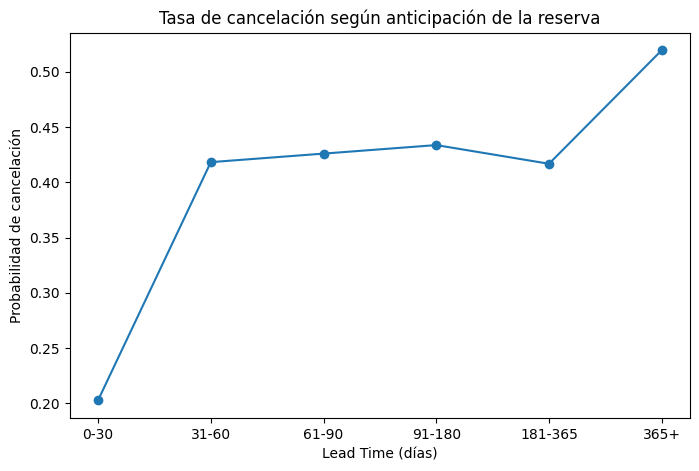

In [30]:
cancel_rate = reservation_df_clean.groupby("lead_time_bin", observed=False)["is_canceled"].mean()

cancel_rate.plot(kind="line", marker="o", figsize=(8,5))
plt.title("Tasa de cancelación según anticipación de la reserva")
plt.xlabel("Lead Time (días)")
plt.ylabel("Probabilidad de cancelación")
plt.show()

El resultado de p-valor fue < 0.001. Esto permite rechazar la hipótesis nula de independencia y concluir que existe una asociación significativa entre el número de días de anticipación y la cancelación de la reserva.

En términos prácticos, este hallazgo confirma la hipótesis planteada: las reservas realizadas con mayor anticipación presentan una mayor probabilidad de cancelación, lo cual coincide con lo observado en las tasas de cancelación por rango (desde un 20% en reservas hechas con menos de 30 días hasta más del 50% en reservas hechas con más de un año de anticipación). Por ejemplo, las reservas hechas con más de 1 año de anticipación tienen más del doble de probabilidad de cancelarse que las hechas con pocas semanas de anticipación. Esto implica que la anticipación en la reserva es un factor clave de riesgo de cancelación.

Estrategia:
Aplicar overbooking controlado (aceptar más reservas que la capacidad real) en ese segmento específico de reservas a muy largo plazo.
Beneficio esperado:
Minimizar el impacto de cancelaciones tardías.
Mantener una ocupación más cercana al 100%.
Transformar un hallazgo estadístico (alto riesgo de cancelación) en una política operativa.

In [52]:
reservation_df_clean.groupby("lead_time_bin", observed=False)["is_canceled"].mean()

lead_time_bin
0-30       0.202882
31-60      0.418294
61-90      0.426011
91-180     0.433724
181-365    0.416819
365+       0.519553
Name: is_canceled, dtype: float64

#### H2:
El tipo de depósito influye en la probabilidad de cancelación.

In [31]:
contingencia_dep = pd.crosstab(
    reservation_df_clean["deposit_type"],
    reservation_df_clean["is_canceled"],
    dropna=False
)
print("Tabla de contingencia:")
print(contingencia_dep)

Tabla de contingencia:
is_canceled       0      1
deposit_type              
No Deposit    29994  14364
No Refund         7    338
Non Refund       31    721
Refundable       83     17


In [32]:
chi2, p, dof, expected = chi2_contingency(contingencia_dep)
print(f"Chi-cuadrado: {chi2}")
print(f"Grados de libertad: {dof}")
print(f"p-valor: {p}")

Chi-cuadrado: 1979.69440447829
Grados de libertad: 3
p-valor: 0.0


In [33]:
# Calcular la tasa de cancelación por tipo de depósito
cancel_rate_dep = reservation_df_clean.groupby("deposit_type")["is_canceled"].mean()
cancel_rate_dep

deposit_type
No Deposit    0.323820
No Refund     0.979710
Non Refund    0.958777
Refundable    0.170000
Name: is_canceled, dtype: float64

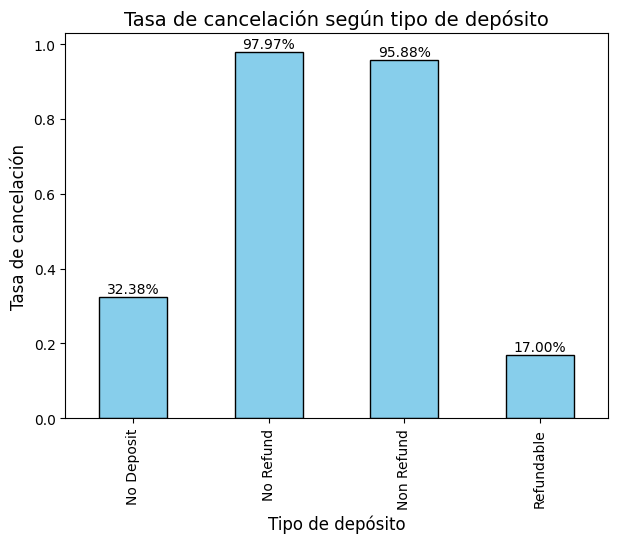

In [34]:
# Graficar
ax = cancel_rate_dep.plot(kind="bar", figsize=(7,5), color="skyblue", edgecolor="black")

# Personalización
ax.set_title("Tasa de cancelación según tipo de depósito", fontsize=14)
ax.set_xlabel("Tipo de depósito", fontsize=12)
ax.set_ylabel("Tasa de cancelación", fontsize=12)

# Mostrar porcentaje arriba de cada barra
for i, v in enumerate(cancel_rate_dep):
    ax.text(i, v + 0.01, f"{v:.2%}", ha="center", fontsize=10)

plt.show()

Se planteó la hipótesis de que el tipo de depósito influye en la probabilidad de cancelación. Para comprobarlo se construyó una tabla de contingencia entre las variables deposit_type y is_canceled y se aplicó la prueba Chi-cuadrado de independencia. El resultado arrojó un valor de p < 0.05, lo cual permite rechazar la hipótesis nula de independencia. Esto sugiere que el tipo de depósito efectivamente tiene un efecto en la probabilidad de cancelación, siendo coherente con la expectativa de que los depósitos no reembolsables desincentivan la cancelación de reservas.

Un hallazgo interesante es que las reservas bajo modalidad No Refund (Pago total anticipado) presentan la mayor tasa de cancelación, lo cual resulta contraintuitivo dado que estas políticas, en teoría, desincentivan la cancelación. Esto podría explicarse por el perfil de los clientes que usan este tipo de reservas, posibles reservas múltiples en paralelo, o incluso inconsistencias en la codificación de los datos. Este resultado sugiere que, más allá de las políticas de depósito, es necesario investigar los canales de distribución y el comportamiento de los clientes para entender mejor las causas de cancelación.

Se utilizo la prueba no parametrica Mann–Whitney ya que compara una variable cuantitativa (lead_time o tiempo de reserva) y una variable culitativa dicotómica y bajo los siguientes supuestos:
- Independencia de las muestras
- Distribución subyacente similar: La forma de la distribución de los datos en ambos grupos debe ser similar.
- No requiere que los datos sigan una distribución normal. (lead_time)
- No asume que las varianzas de los grupos sean iguales.

In [ ]:
from scipy.stats import mannwhitneyu


canceladas = reservation_df_clean[reservation_df_clean["is_canceled"] == 1]["lead_time"]
no_canceladas = reservation_df_clean[reservation_df_clean["is_canceled"] == 0]["lead_time"]

print(stats.shapiro(canceladas.sample(5000, random_state=1)))
print(stats.shapiro(no_canceladas.sample(5000, random_state=1)))

stat, p = mannwhitneyu(lead_time_canceladas, lead_time_no_canceladas, alternative="two-sided")

print("Estadístico U:", stat)
print("p-valor:", p)
# Se convierte la variable continua en categorías con el fin de comparar proporción. 
reservation_df_clean = reservation_df_clean.copy()

## Prueba hipotesis U de Mann-Whitney.

In [75]:
A= checkout_df[checkout_df["hotel"]== "City Hotel"]["stays_in_week_nights"]
B= checkout_df[checkout_df["hotel"]== "Resort Hotel"]["stays_in_week_nights"]
checkout_df[checkout_df["hotel"]== "City Hotel"]["stays_in_week_nights"].describe()


count    3792.000000
mean        2.309863
std         1.522617
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        34.000000
Name: stays_in_week_nights, dtype: float64

In [76]:
checkout_df[checkout_df["hotel"]== "Resort Hotel"]["stays_in_week_nights"].describe()

count    25953.000000
mean         3.039148
std          2.491046
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         50.000000
Name: stays_in_week_nights, dtype: float64

C:\Users\Diego\AppData\Local\Temp\ipykernel_21448\1768540241.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, showmeans=True, vert=False, labels=["Reservas exitosas (Check-Out)", "Reservas canceladas"])


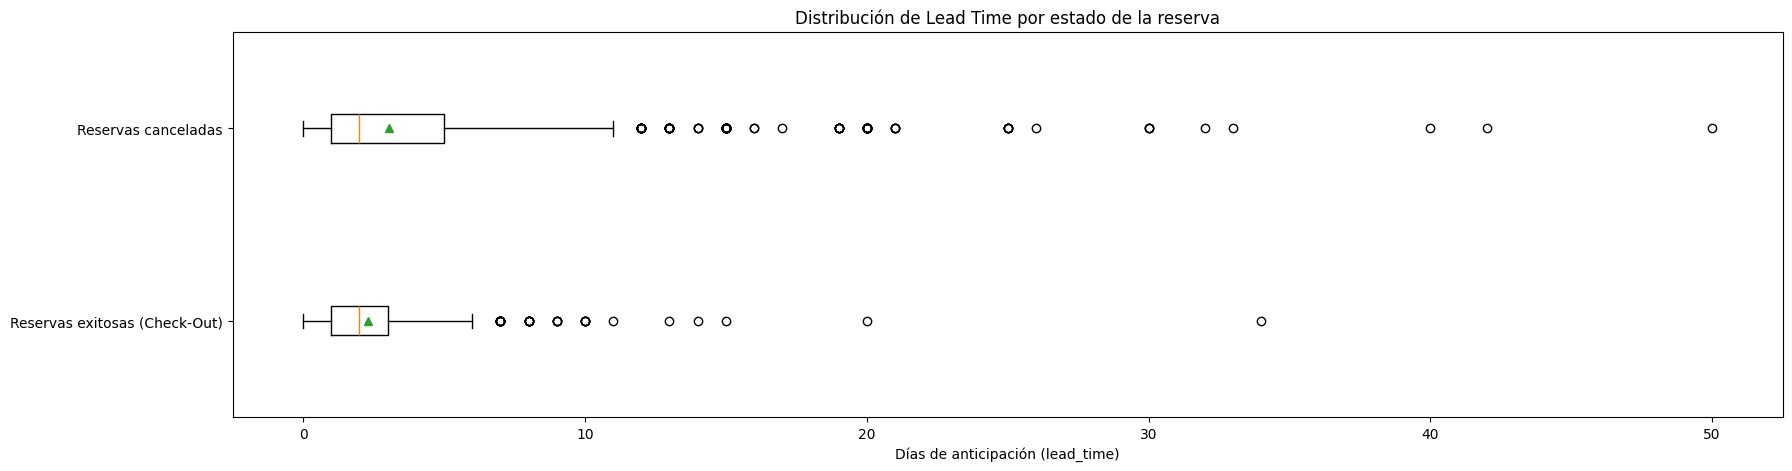

In [64]:
plt.figure(figsize=(20, 5))

# Crear lista con los dos conjuntos de datos
data = [A, B]

# Graficar boxplot
plt.boxplot(data, showmeans=True, vert=False, labels=["Reservas exitosas (Check-Out)", "Reservas canceladas"])

plt.title("Distribución de Lead Time por estado de la reserva")
plt.xlabel("Días de anticipación (lead_time)")
plt.show()

In [66]:
print(A.skew())     # Asimetría
print(A.kurtosis()) # Curtosis

3.870637458107868
57.81011034415443


In [67]:
print(B.skew())     # Asimetría
print(B.kurtosis()) # Curtosis

2.2644493173558837
16.87834241426525


Por las pruebas anteriores se puede concluir que las 2 variables no siguen una distribucion normal, sino que los valores atipicos positivos hacen que se presente una asimetria positiva. Se usa esta prueba de hipotesis siguiendo los siguientes supuestos:
- No paramétrica: A diferencia de pruebas como la t de Student, la prueba de Mann-Whitney no asume que los datos sigan una distribución normal. Esto la hace ideal para tu situación.

- Compara rangos: En lugar de comparar las medias, compara los rangos de las observaciones para determinar si hay una diferencia significativa en la distribución de los tiempos de estadía entre los dos hoteles.

- Variables: Se usa para comparar una variable cuantitativa (el tiempo de estadía) entre dos grupos de una variable cualitativa (el nombre o tipo de hotel).


**Step 1.** Define null and alternative hypothesis:

$$
H_0: \mu_1 = \mu_2
$$
$$
H_a: \mu_1 \neq \mu_2
$$  

h0 = tiempo promedio de dias de estancia entre semana en resort hotel es igual al tiempo promedio de dias entre semana de City hotel
h1= h0 negada

In [70]:
import numpy as np
from scipy.stats import mannwhitneyu
estadistico_u, p_valor = mannwhitneyu(A, B, alternative='two-sided')
# Imprimir los resultados
print(f"Estadístico U: {estadistico_u}")
print(f"P-valor: {p_valor}")

Estadístico U: 42567807.5
P-valor: 1.7941412137290574e-42


In [73]:
# Obtener los tamaños de las muestras
n1 = len(A)
n2 = len(B)

# Calcular la correlación biserial por rangos (r)
r = 1 - (2 * estadistico_u) / (n1 * n2)
print(r)

0.13492177152109275


- Interpretar la magnitud del efecto
- if abs(r) < 0.3:
    print("El tamaño del efecto es pequeño (< 0.30).")
- elif abs(r) < 0.5:
    print("El tamaño del efecto es mediano (< 0.50).")
- else:
    print("El tamaño del efecto es grande (>= 0.50).")

In [71]:
# Interpretar el resultado
alpha = 0.05
print("\nInterpretación:")
if p_valor < alpha:
    print("El p-valor es menor que el nivel de significancia (alpha).")
    print("Se rechaza la hipótesis nula. Existe una diferencia significativa entre los dos grupos.")
else:
    print("El p-valor es mayor que el nivel de significancia (alpha).")
    print("No se rechaza la hipótesis nula. No hay evidencia de una diferencia significativa entre los dos grupos.")



Interpretación:
El p-valor es menor que el nivel de significancia (alpha).
Se rechaza la hipótesis nula. Existe una diferencia significativa entre los dos grupos.


Hay una diferencia estadísticamente significativa en los tiempos de estadía entre el resort y el city hotel, la magnitud es baja y aunque existe esa diferencia no es muy fuerte. POr lo anterior, 

- Hoteles: Al tener estadías más cortas, el enfoque debe ser maximizar el ingreso por noche. Esto implica ofrecer tarifas flexibles, servicios de valor añadido (como desayuno o Wi-Fi de alta velocidad) y promociones para estancias cortas.

- Resorts: Con estadías más largas, pueden ofrecer paquetes que incluyan actividades, comidas o descuentos por noche para estancias prolongadas. El objetivo es aumentar el gasto total del cliente y fomentar una permanencia extendida
